In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/kc_house_data.csv')

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [7]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<AxesSubplot:title={'center':'Correlation with price'}>

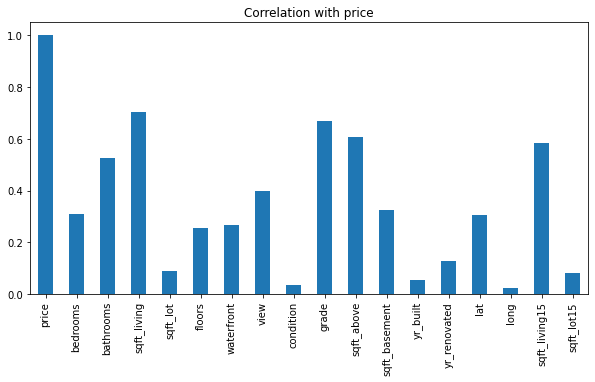

In [9]:
df.corrwith(df['price']).plot.bar(figsize=(10,5),title='Correlation with price')

In [10]:
x=df[['bathrooms','sqft_living']]
y=df['price']

In [11]:
import xgboost as xgb

In [12]:
data_matrix = xgb.DMatrix(x,y)

In [13]:
params={
    'learning_rate': .01,
    'max_depth': 15,
    'alpha':10
}

<AxesSubplot:>

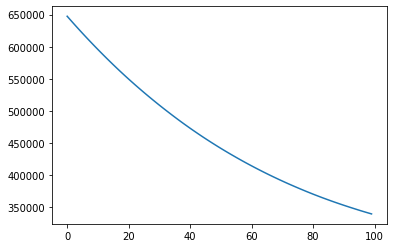

In [14]:
result = xgb.cv(
    params,
    data_matrix,
    num_boost_round=100,
    early_stopping_rounds=5,
    metrics='rmse',
)
result
result['test-rmse-mean'].plot()

In [15]:
grid_params = [
    (max_depth,learning_rate,alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)

]
min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
    print(f'Current best params: {best_params}')

Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (

KeyboardInterrupt: 

final run


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [19]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)

In [20]:
model = xgb.train(
     params,
     train_matrix,
     num_boost_round = 500,
     early_stopping_rounds=5,
     evals=[(test_matrix , 'test')],
)
model.save_model('kc_house_model.xgb')

[0]	test-rmse:641463.31250
[1]	test-rmse:635978.06250
[2]	test-rmse:630555.18750
[3]	test-rmse:625195.68750
[4]	test-rmse:619896.43750
[5]	test-rmse:614657.56250
[6]	test-rmse:609486.06250
[7]	test-rmse:604378.37500
[8]	test-rmse:599326.12500
[9]	test-rmse:594332.62500
[10]	test-rmse:589397.25000
[11]	test-rmse:584520.62500
[12]	test-rmse:579706.68750
[13]	test-rmse:574944.00000
[14]	test-rmse:570234.37500
[15]	test-rmse:565581.68750
[16]	test-rmse:561021.25000
[17]	test-rmse:556484.37500
[18]	test-rmse:552003.50000
[19]	test-rmse:547597.68750
[20]	test-rmse:543227.37500
[21]	test-rmse:538906.37500
[22]	test-rmse:534640.25000
[23]	test-rmse:530481.43750
[24]	test-rmse:526351.37500
[25]	test-rmse:522274.09375
[26]	test-rmse:518224.71875
[27]	test-rmse:514275.34375
[28]	test-rmse:510324.59375
[29]	test-rmse:506410.25000
[30]	test-rmse:502604.40625
[31]	test-rmse:498813.96875
[32]	test-rmse:495098.65625
[33]	test-rmse:491457.28125
[34]	test-rmse:487808.50000
[35]	test-rmse:484256.84375
[3

In [21]:
saved_model = xgb.Booster()
saved_model.load_model('kc_house_model.xgb')

In [22]:
x.head(2)

,bathrooms,sqft_living
0,1.00,1180
1,2.25,2570


In [23]:
saved_model.predict(xgb.DMatrix(x.head(2)))

array([317347.03, 553587.75], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

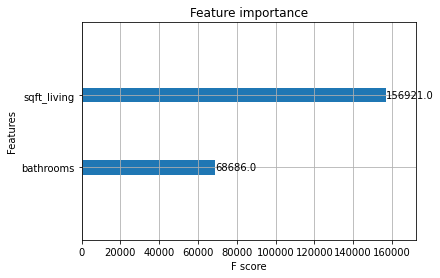

In [24]:
xgb.plot_importance(model)

ImportError: You must install graphviz to plot tree

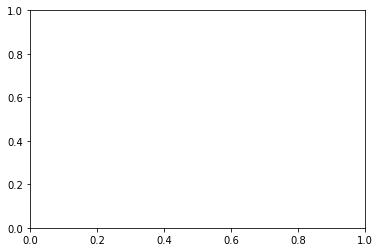

In [ ]:
#flask application to predict